## Assignment 4, Dataset 10
## Student Name: Paria Ighanian, Student ID: 0200155529


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

In [2]:
facebook_G = nx.read_edgelist('Facebook-Ego/3437_3.edges', nodetype=int)

## a. Choose one of the datasets, calculate the betweenness closeness and PageRank mentioned in the lecture on all of the nodes. Please compare the results. What cause the difference between the results?

In [16]:
# Calculate centrality measures
betweenness_centrality = nx.betweenness_centrality(facebook_G)
pagerank = nx.pagerank(facebook_G)


centrality_df = pd.DataFrame({
    'Node': betweenness_centrality.keys(),
    'Betweenness Centrality': betweenness_centrality.values(),
    'PageRank': pagerank.values()
})


In [17]:
centrality_df.sort_values(by='Betweenness Centrality', ascending=False).reset_index(drop=True).head(10)

,Node,Betweenness Centrality,PageRank
0,3830,0.045219,0.031868
1,3782,0.037627,0.014872
2,3793,0.034110,0.020289
3,3738,0.022091,0.010870
4,3859,0.021392,0.005909
5,3836,0.020356,0.008028
6,3756,0.017498,0.013587
7,3861,0.015845,0.010764
8,3763,0.015614,0.006250
9,3851,0.014960,0.019100


In [18]:
centrality_df.sort_values(by='PageRank', ascending=False).reset_index(drop=True).head(10)

,Node,Betweenness Centrality,PageRank
0,3830,0.045219,0.031868
1,3793,0.034110,0.020289
2,3851,0.014960,0.019100
3,3758,0.014579,0.015786
4,3753,0.005324,0.015316
5,3782,0.037627,0.014872
6,3824,0.005071,0.014107
7,3756,0.017498,0.013587
8,3835,0.002953,0.012851
9,3764,0.007691,0.012535


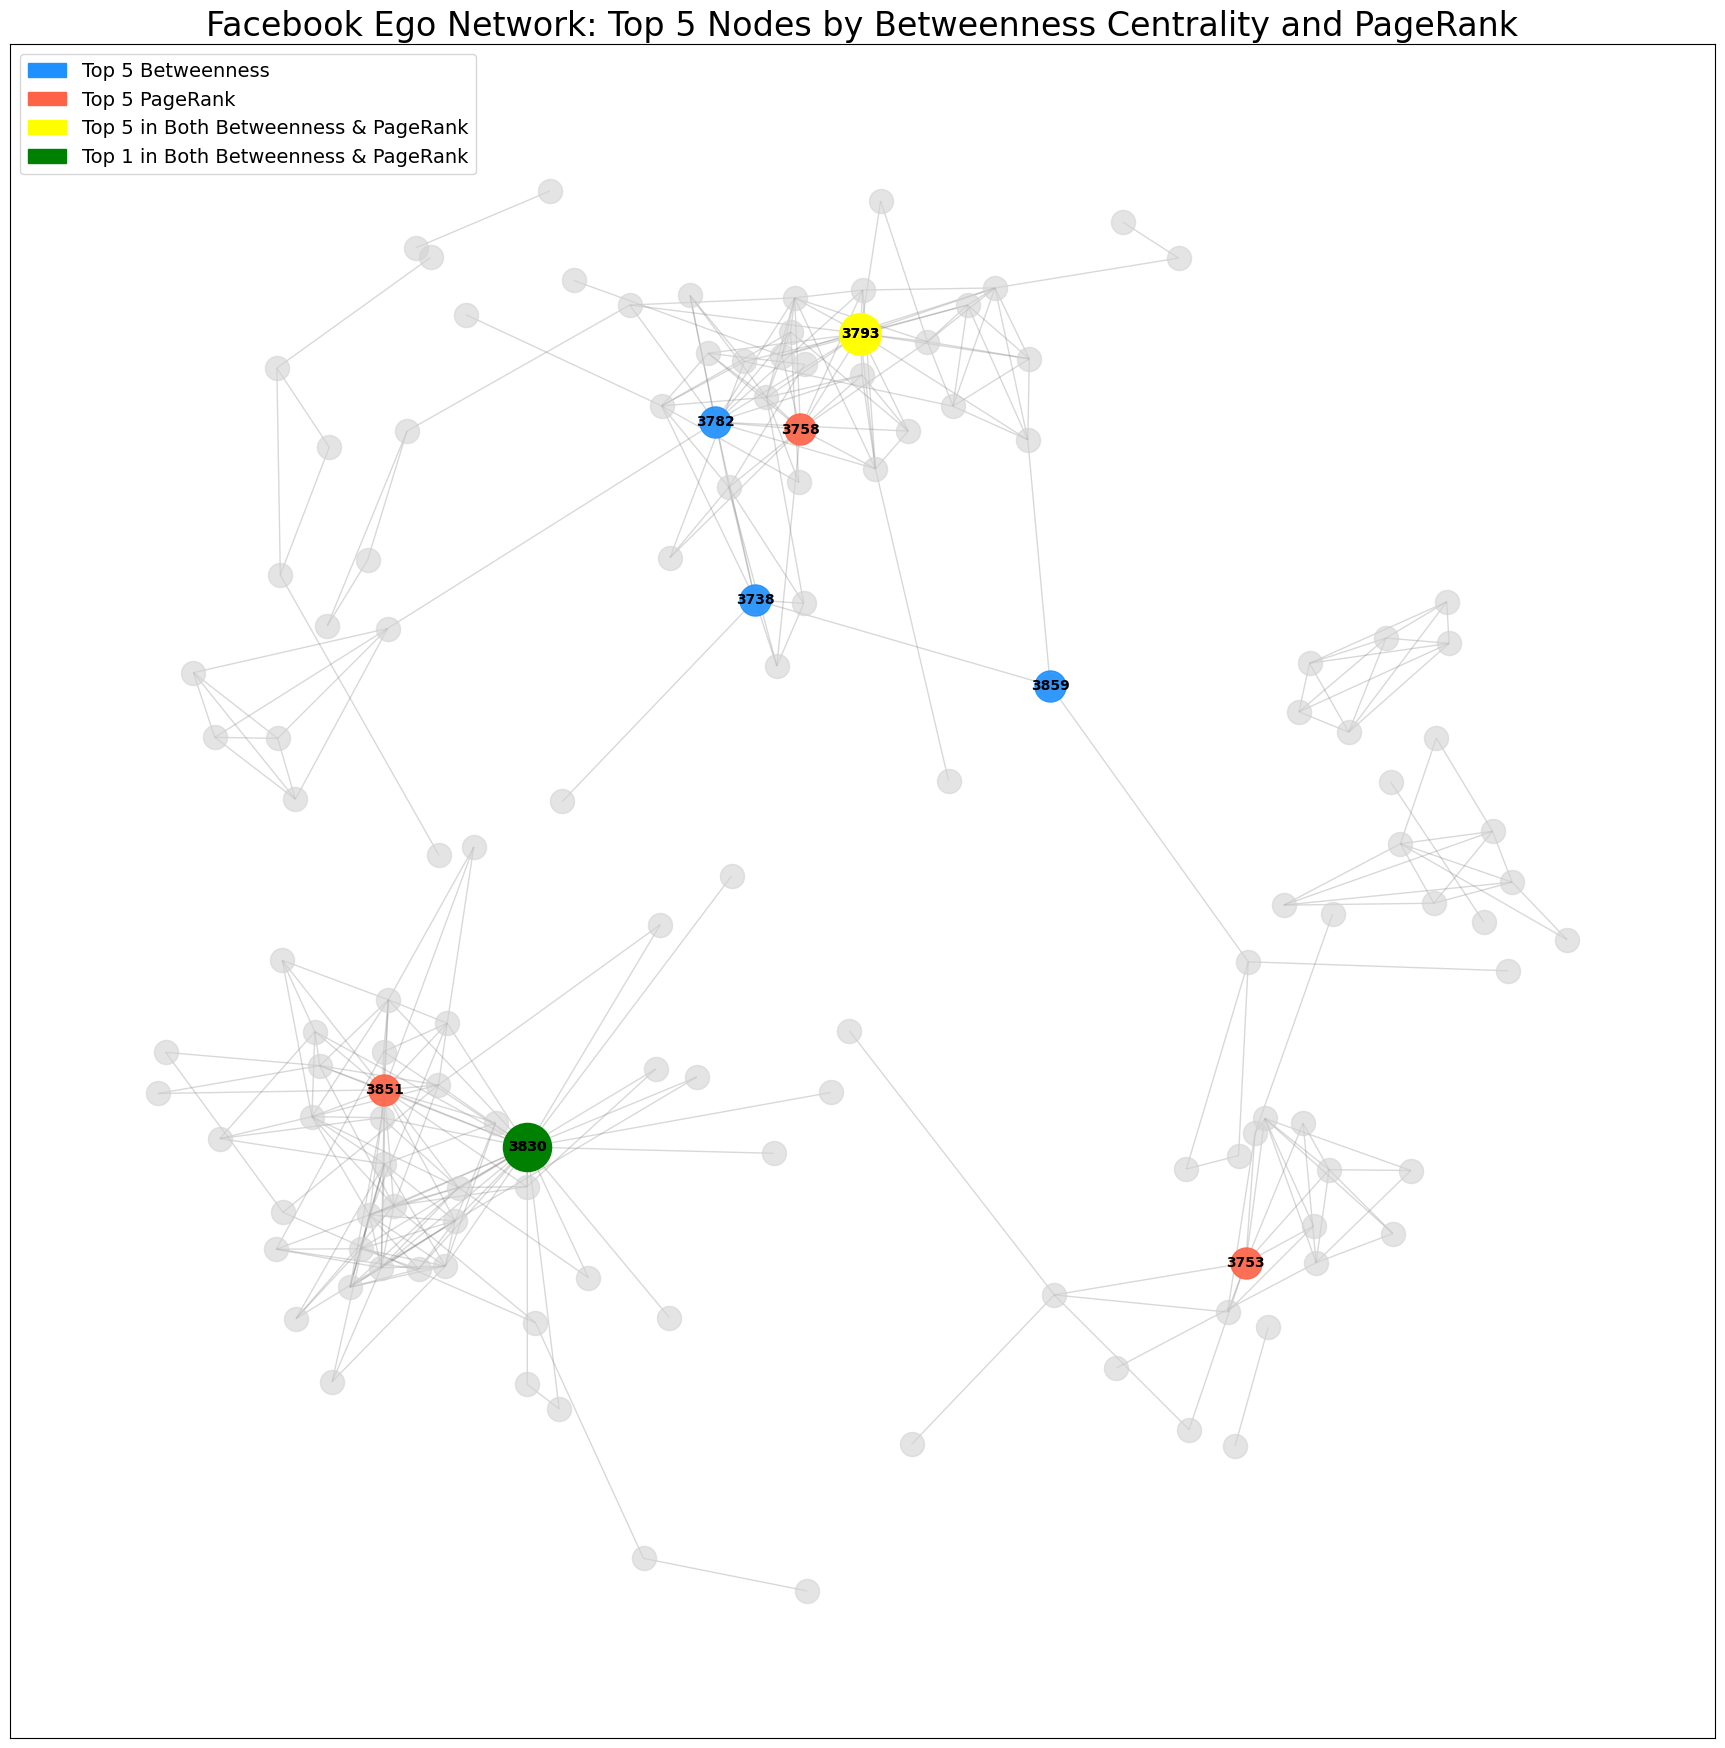

In [66]:
# the top 5 nodes based on betweenness centrality and pagerank
top_5_betweenness_nodes = centrality_df.sort_values(by='Betweenness Centrality', ascending=False)['Node'].head(5).tolist()
top_5_pagerank_nodes = centrality_df.sort_values(by='PageRank', ascending=False)['Node'].head(5).tolist()

highest_betweenness_node = centrality_df.loc[centrality_df['Betweenness Centrality'].idxmax(), 'Node']
highest_pagerank_node = centrality_df.loc[centrality_df['PageRank'].idxmax(), 'Node']

# Find the overlap nodes between the top 5 for both centrality measures
overlap_nodes = list(set(top_5_betweenness_nodes).intersection(set(top_5_pagerank_nodes)))

# Set the color for the node that ranks highest in both Betweenness and PageRank
if highest_betweenness_node == highest_pagerank_node:
    highest_node_in_both = highest_betweenness_node
else:
    highest_node_in_both = None

pos = nx.spring_layout(facebook_G, k=1.5, iterations=300, seed=30)

plt.figure(figsize=(22, 22))

# Draw non-highlighted nodes with light gray color
nx.draw_networkx_nodes(facebook_G, pos, node_color='lightgray', node_size=300, alpha=0.6)

# Highlight the top 5 nodes by betweenness in blue
top_5_betweenness_excl_overlap = [node for node in top_5_betweenness_nodes if node not in overlap_nodes]
nx.draw_networkx_nodes(facebook_G, pos, nodelist=top_5_betweenness_excl_overlap, node_color='#1E90FF', node_size=500, alpha=0.9)  # Blue

# Highlight the top 5 nodes by PageRank in red
top_5_pagerank_excl_overlap = [node for node in top_5_pagerank_nodes if node not in overlap_nodes]
nx.draw_networkx_nodes(facebook_G, pos, nodelist=top_5_pagerank_excl_overlap, node_color='#FF6347', node_size=500, alpha=0.9)  # Red

# Highlight the overlap nodes (in both top 5 Betweenness and PageRank) in yellow
overlap_excl_highest = [node for node in overlap_nodes if node != highest_node_in_both]
nx.draw_networkx_nodes(facebook_G, pos, nodelist=overlap_excl_highest, node_color='yellow', node_size=900, alpha=1)  # Yellow

# Highlight the node that ranks highest in both metrics in green (if it exists)
if highest_node_in_both:
    nx.draw_networkx_nodes(facebook_G, pos, nodelist=[highest_node_in_both], node_color='green', node_size=1200, alpha=1)  # Green

nx.draw_networkx_edges(facebook_G, pos, edge_color='gray', alpha=0.3, width=1)

labels_betweenness = {node: node for node in top_5_betweenness_nodes}
nx.draw_networkx_labels(facebook_G, pos, labels_betweenness, font_size=10, font_color='black', font_weight='bold')

labels_pagerank = {node: node for node in top_5_pagerank_nodes}
nx.draw_networkx_labels(facebook_G, pos, labels_pagerank, font_size=10, font_color='black', font_weight='bold')



legend_elements = [
    mpatches.Patch(color='#1E90FF', label='Top 5 Betweenness'),
    mpatches.Patch(color='#FF6347', label='Top 5 PageRank'),
    mpatches.Patch(color='yellow', label='Top 5 in Both Betweenness & PageRank'),
    mpatches.Patch(color='green', label='Top 1 in Both Betweenness & PageRank')
]

plt.legend(handles=legend_elements, loc='upper left', fontsize=14)

plt.title('Facebook Ego Network: Top 5 Nodes by Betweenness Centrality and PageRank', fontsize=24)
plt.show()

#### The differences between Betweenness Centrality and PageRank come from their unique approaches to measuring node importance in the network. Betweenness Centrality identifies nodes that act as bridges between different clusters, highlighting those critical for connecting distinct parts of the network. In contrast, PageRank emphasizes nodes that are well-connected to other influential nodes, focusing on overall connectivity within dense regions of the network. For example, node 3830, which ranks highest in both metrics, serves as both a key bridge and a highly connected hub. Other nodes that score high in Betweenness Centrality but lower in PageRank may effectively connect separate clusters but lack the broad connectivity that PageRank prioritizes. Conversely, nodes with high PageRank but lower Betweenness Centrality tend to be central within densely connected regions but are less involved in linking different parts of the network. Whether a node ranks highly on one or both of these measures depends on its position in the network—whether it functions as a critical bridge, a well-connected hub, both, or none.

In [30]:
connected_components = list(nx.connected_components(facebook_G))

len(connected_components)

9

#### As we have several connected components in the network, I also applied betweenness centrality separately on each component.

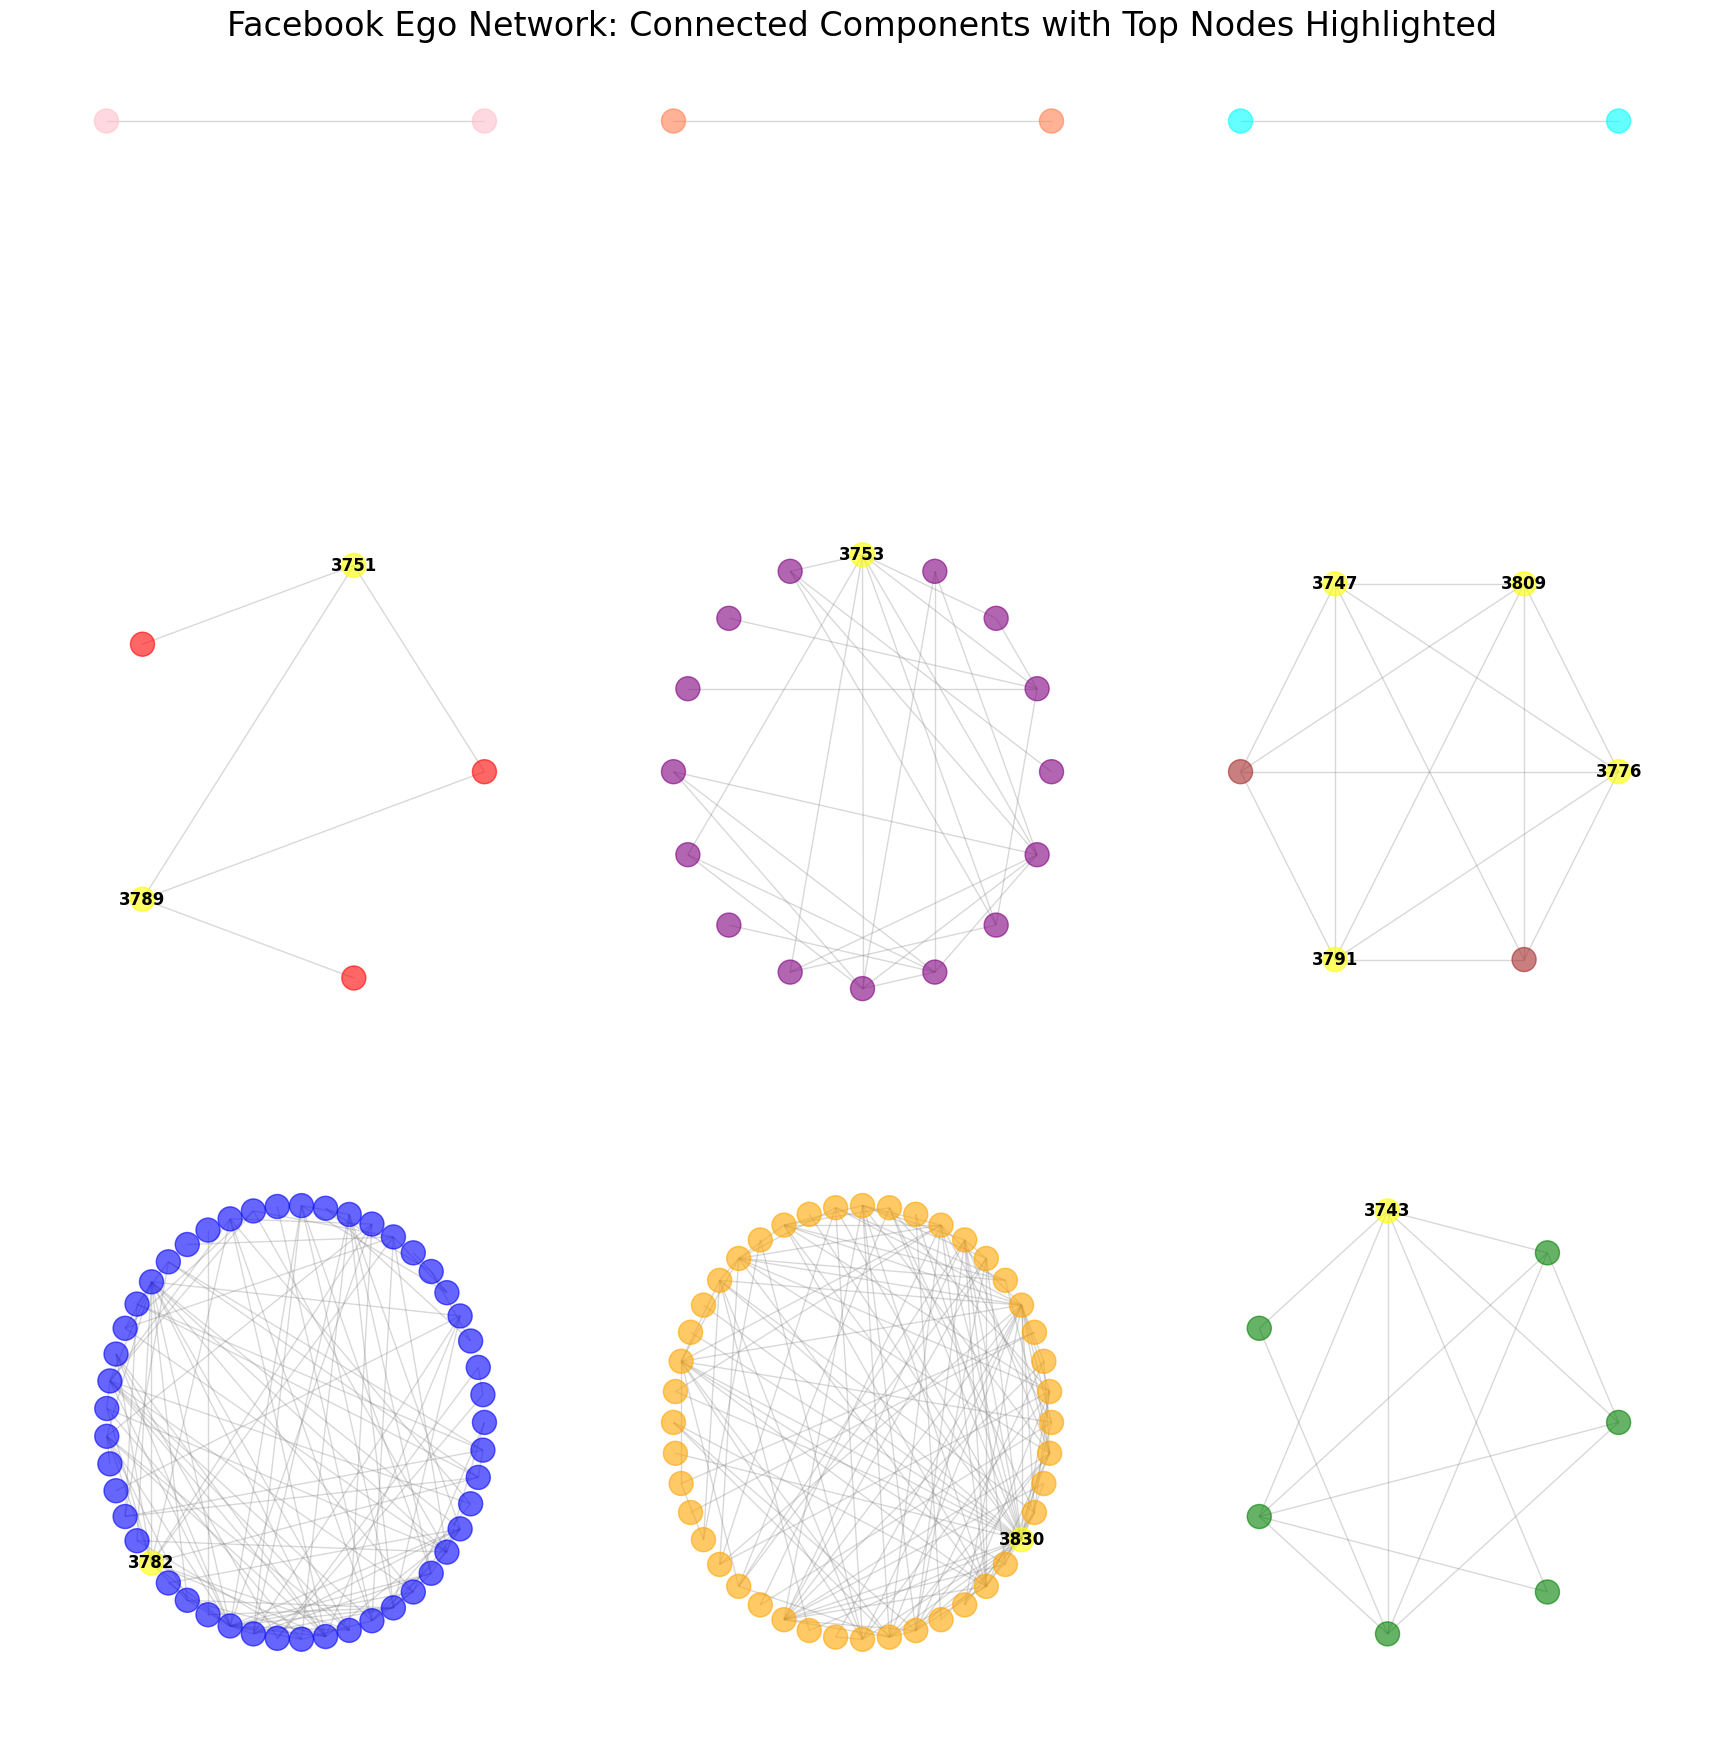

   Component Index  Node  Betweenness Centrality
0                0  3782                0.288406
1                1  3830                0.432965
2                2  3743                0.266667
3                3  3751                0.500000
4                3  3789                0.500000
5                4  3753                0.438413
6                5  3776                0.025000
7                5  3809                0.025000
8                5  3747                0.025000
9                5  3791                0.025000


In [67]:
# Initialize a list to store top nodes and their betweenness centrality scores
top_nodes_info = []
color_map = {}  

# Predefined colors for the components (excluding yellow)
colors = [
    'blue', 'orange', 'green', 'red', 'purple',
    'brown', 'pink', 'coral', 'cyan', 'lightgreen'
]

# Loop through each connected component and compute betweenness centrality
for idx, component in enumerate(connected_components):
    subgraph = facebook_G.subgraph(component)  # Extract the subgraph for the component
    betweenness_centrality_subgraph = nx.betweenness_centrality(subgraph)  # Calculate betweenness centrality
    
    # Find the maximum betweenness centrality score in this component
    max_score = max(betweenness_centrality_subgraph.values())  

    component_color = colors[idx % len(colors)]  # Use a predefined color based on the component index

    for node in component:
        color_map[node] = component_color  

    # Change the color of all nodes with the highest score to yellow if the score is positive
    for node, score in betweenness_centrality_subgraph.items():
        if score == max_score and score > 0:
            color_map[node] = 'yellow'  
            top_nodes_info.append((idx, node, score))  

top_nodes_df = pd.DataFrame(top_nodes_info, columns=['Component Index', 'Node', 'Betweenness Centrality'])

plt.figure(figsize=(22, 22))

num_components = len(connected_components)
cols = 3  
rows = (num_components // cols) + (num_components % cols > 0)  

# Loop through each connected component for plotting
for idx, component in enumerate(connected_components):
    subgraph = facebook_G.subgraph(component)  # Extract the subgraph for the component
    pos = nx.circular_layout(subgraph)  # Create circular layout

    # Calculate the position for this component
    x_offset = (idx % cols) * 3  
    y_offset = (idx // cols) * 3  
    pos = {node: (x + x_offset, y + y_offset) for node, (x, y) in pos.items()}  

    node_colors = [color_map.get(node, 'lightblue') for node in subgraph.nodes()]  
    nx.draw_networkx_nodes(subgraph, pos, node_color=node_colors, node_size=300, alpha=0.6)

    nx.draw_networkx_edges(subgraph, pos, edge_color='gray', alpha=0.3, width=1)

    labels = {node: node for idx2, node, score in top_nodes_info if score > 0 and node in subgraph}
    nx.draw_networkx_labels(subgraph, pos, labels, font_size=12, font_color='black', font_weight='bold')

plt.title('Facebook Ego Network: Connected Components with Top Nodes Highlighted', fontsize=24)
plt.axis('off') 
plt.show()

print(top_nodes_df)

#### I observed that when I calculated betweenness centrality separately for each connected component, the results were generally higher. This is likely because some segments have significantly fewer nodes, which increases the chances of certain nodes acting as bridges between others. In contrast, when I applied the measure to the entire network without considering the separate components, the overall results were lower. This outcome is logical, as larger networks tend to distribute the bridging roles among many nodes, leading to lower centrality scores.

## c. Please plot the largest strong connected component in the Twitter-Ego dataset.

In [10]:
twitter_G = nx.read_edgelist('Twitter-Ego/7517222.edges', create_using=nx.DiGraph(), nodetype=int)


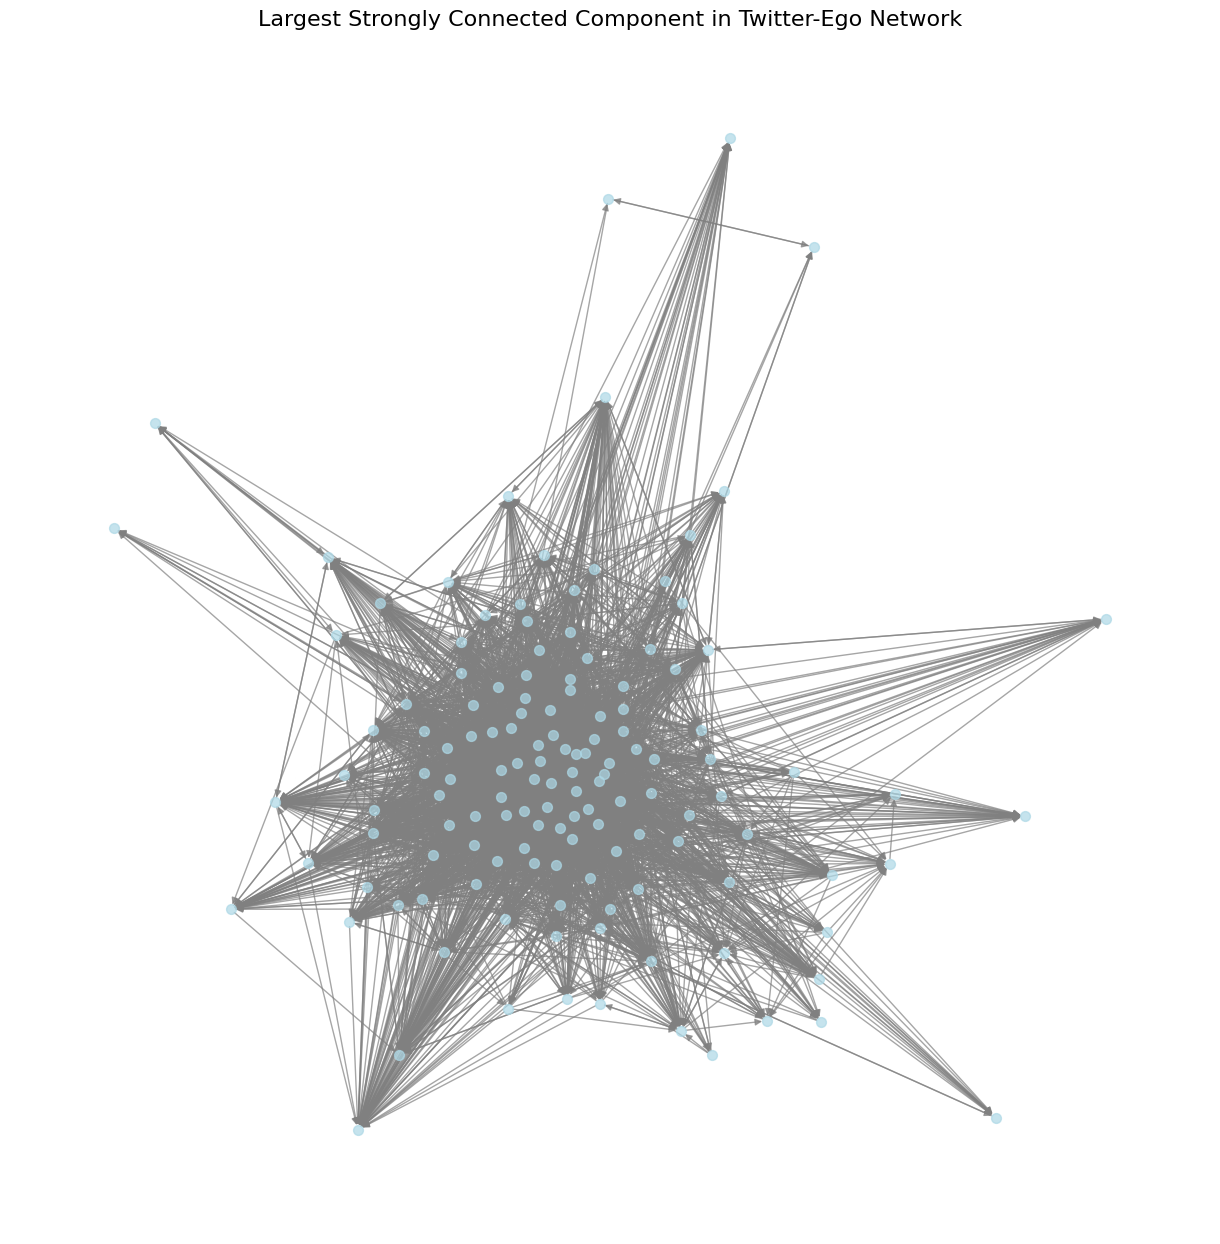

In [23]:
strongly_connected_components = list(nx.strongly_connected_components(twitter_G))

# the largest strongly connected component
largest_scc = max(strongly_connected_components, key=len)

largest_scc_subgraph = twitter_G.subgraph(largest_scc).copy()

plt.figure(figsize=(12, 12))

pos = nx.spring_layout(largest_scc_subgraph, seed=42)

nx.draw(largest_scc_subgraph, pos, node_color='lightblue', node_size=50, edge_color='gray', alpha=0.7, with_labels=False)

plt.title('Largest Strongly Connected Component in Twitter-Ego Network', fontsize=16)
plt.show()

## d. Choose the results of one of the two algorithms mentioned in question (a), and choose the node with the highest value and the node with lowest value. Please plot the distributions of Jaccard similarity, cosine similarity and normalized Euclidean distance between either of the two nodes and the rest of the nodes in the graph.

In [72]:
# Choose the PageRank measure
centrality_measure = 'PageRank'

# Get the node with the highest PageRank value in Facebook Network
highest_node = centrality_df.loc[centrality_df[centrality_measure].idxmax()]
highest_node_name = int(highest_node['Node'])  # Ensure node name is an integer
highest_node_value = highest_node[centrality_measure]

# Get the node with the lowest PageRank value in Facebook Network
lowest_node = centrality_df.loc[centrality_df[centrality_measure].idxmin()]
lowest_node_name = int(lowest_node['Node'])  # Ensure node name is an integer
lowest_node_value = lowest_node[centrality_measure]

# Output the results
print(f"Node with the highest {centrality_measure}: {highest_node_name} with value {highest_node_value}")
print(f"Node with the lowest {centrality_measure}: {lowest_node_name} with value {lowest_node_value}")

Node with the highest PageRank: 3830 with value 0.0318681896402947
Node with the lowest PageRank: 3880 with value 0.0021696500878207333
